In [28]:
import pandas as pd
import numpy as np
from statistics import *
import copy
from IPython.display import display
pd.options.display.max_rows = 450
import pwv
import importlib

importlib.reload(pwv)

# Preprocessing

In [27]:
#processing data from given filepath. See pwv.py for directory requirements
filepath = ""
waveformData, segmentIndices, plots = pwv.preprocess(filepath, returnPlot=[True, True, True], patPlotShow=0)

## Filtering Waveforms

### Raw Waveforms

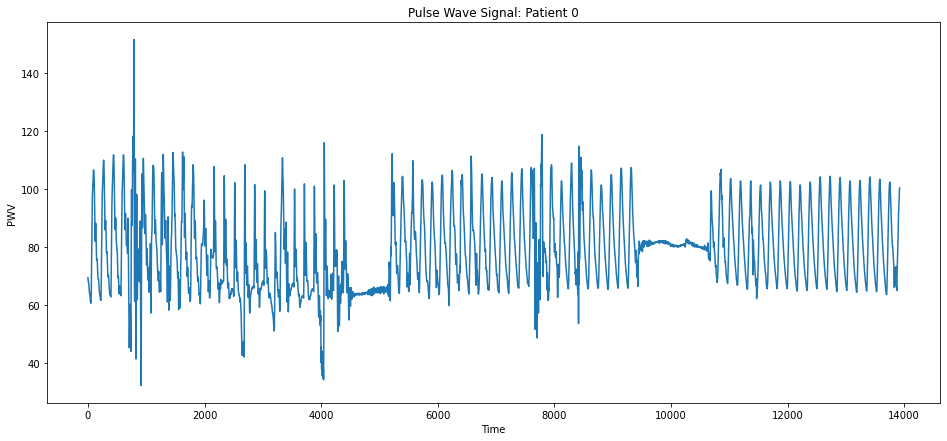

In [11]:
plots[0]

We can filter the waveform using highpass and lowpass Butterworth filters to get a smoother wave.

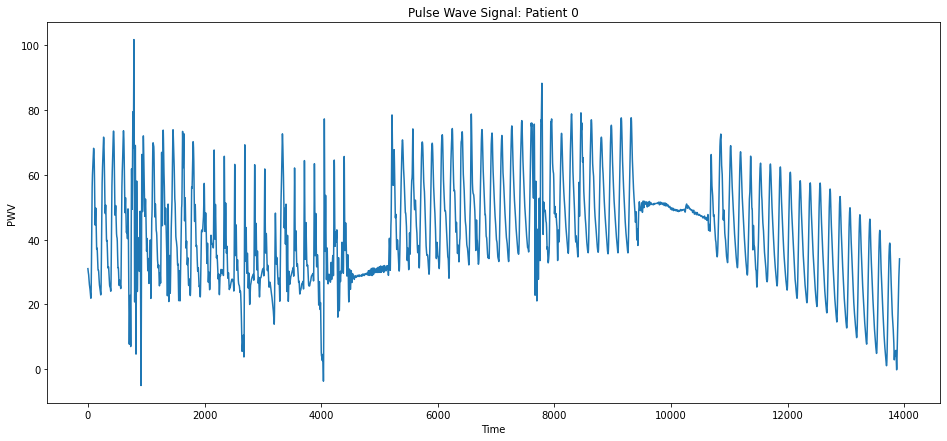

In [12]:
plots[1]

## Segmentation of Waveforms
Below is the filtered waveform for the selected patient. We will examine the first 4000 values.

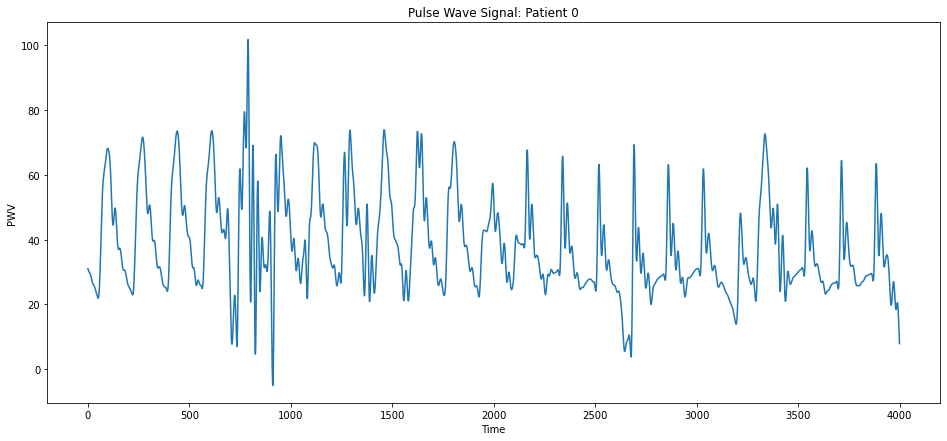

In [13]:
plots[2]

We can segment this waveform into each individual pulsewave.

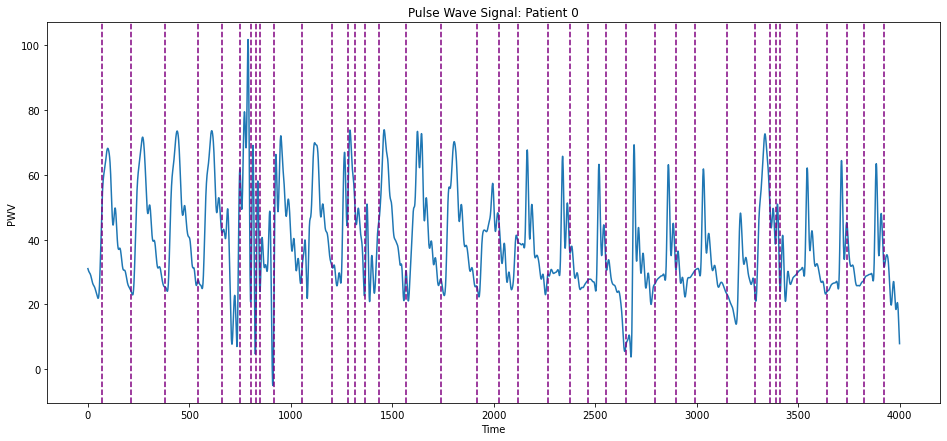

In [14]:
plots[3]

We can also plot inidivdual segments.

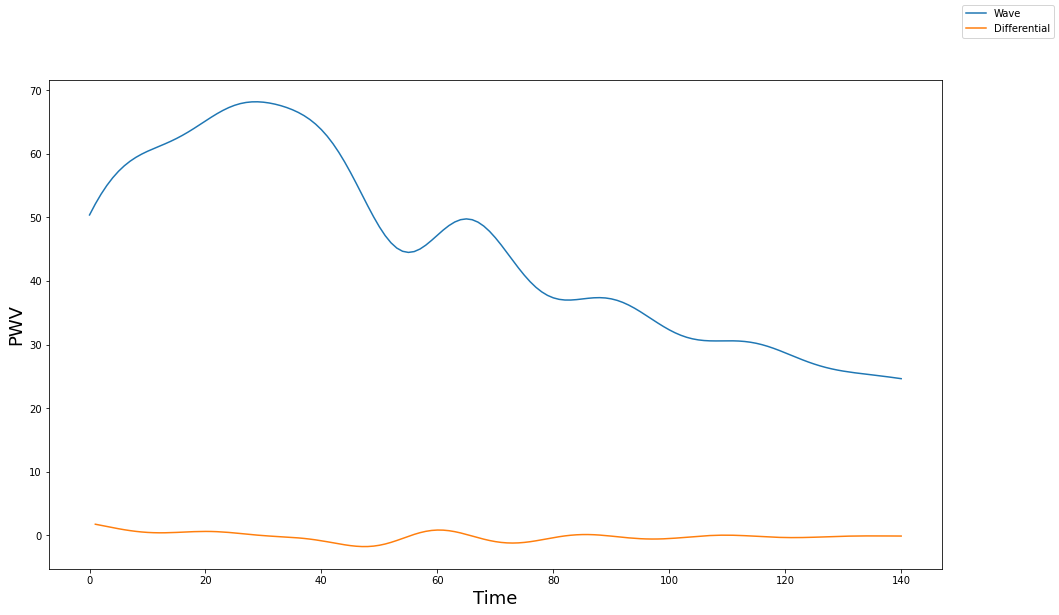

In [15]:
plots = pwv.plotSegment(waveformData, segmentIndices)
plots.iloc[0, 0]

# Metric Calculation

Here we calculate the metrics for each patient:

In [16]:
metrics = pwv.analyzeWave(waveformData, segmentIndices)

We can also visualize the metrics for one wave (choose a patient and wave segment to visualize).

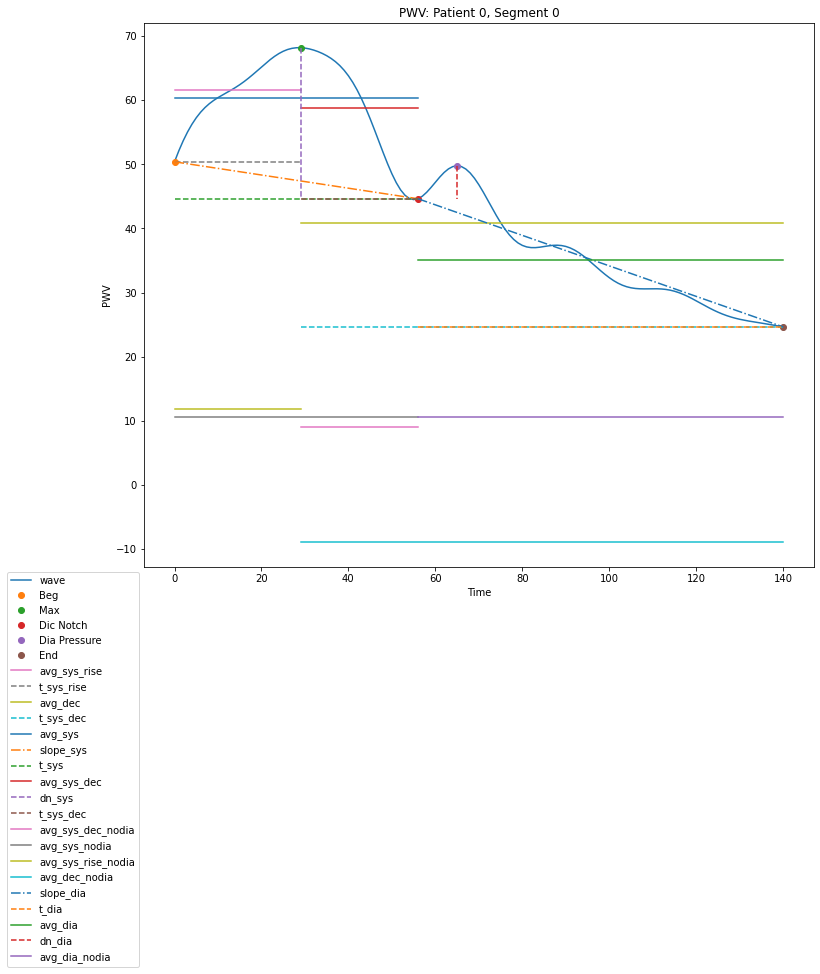

In [23]:
patient_number = [0]
segment_number = [0]
plots, points, mets = pwv.interPlotSegment(waveformData, segmentIndices, patient_number, segment_number)
plots.iloc[0,0]

# Machine Learning

In [24]:
#removing patients with corrupted data and labelling outcomes
metrics = metrics[metrics["patient #"]!= 5]
metrics = metrics[metrics["patient #"]!= 17]

outcomes = [0,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0]
metrics['outcome'] = metrics.apply(lambda row: outcomes[int(row[0])], axis=1)

Now we can calculate our accuracy at classifying heart failure with several different models.

In [25]:
#splitting data for classification
x = metrics.iloc[:,2:26]
y = metrics.iloc[:,26]

In [26]:
print("POPULATION LEVEL: Model options for machine learning:\n1. Logistic \n2. Decision Tree \n3. SVM \n4. K Nearest \n5. Naive Bayes \n6. Bagging \n7. Random Forest\n")
choices = input('Model(s) choice (seperate #s with spaces): ')
selected = [int(x) for x in choices.split()]

columns=["Accuracy", "Precision", "Sensitivity", "Specificity"]
rows=["Logistic", "Decision Tree", "SVM", "K-Nearest", "Naive Bayes", "Bagging", "Random Forest"]
results = pd.DataFrame(columns=columns, index=rows)

models = {1:pwv.logistic(x,y),2:pwv.decisionTree(x,y),3:pwv.sv(x,y),4:pwv.KNeighbors(x,y),5:pwv.gaussianNB(x,y),6:pwv.baggingClassifier(x,y),7:pwv.randomForestClassifier(x,y)}
for choice in selected:
    accuracy, precision, sensitivity, specificity = models[choice]
    results.at[rows[choice-1],"Accuracy"] = accuracy
    results.at[rows[choice-1],"Precision"] = precision
    results.at[rows[choice-1],"Sensitivity"] = sensitivity
    results.at[rows[choice-1],"Specificity"] = specificity

results = results[~results.isnull().any(axis=1)]
results

POPULATION LEVEL: Model options for machine learning:
1. Logistic 
2. Decision Tree 
3. SVM 
4. K Nearest 
5. Naive Bayes 
6. Bagging 
7. Random Forest

Model(s) choice (seperate #s with spaces): 1 2 3 4 5 6 7


,Accuracy,Precision,Sensitivity,Specificity
Logistic,0.715571,0.723488,0.927658,0.293165
Decision Tree,0.826885,0.86836,0.871986,0.735695
SVM,0.665783,0.665783,1.0,0.0
K-Nearest,0.713093,0.766002,0.820054,0.500081
Naive Bayes,0.354642,0.897459,0.037582,0.986267
Bagging,0.859153,0.899247,0.887927,0.805744
Random Forest,0.880548,0.89909,0.926436,0.790165
